In [2]:
import numpy as np 
import pandas as pd 

data = pd.read_csv('/kaggle/input/student-startup-success-dataset/student_startup_success_dataset.csv')
data.head()

,project_id,institution_name,institution_type,project_domain,team_size,avg_team_experience,innovation_score,funding_amount_usd,mentorship_support,incubation_support,market_readiness_level,competition_awards,business_model_score,technology_maturity,year,success_label
0,P0001,Institution_39,Non-technical,AgriTech,3,1.35,0.75,48336.75,1,1,3,3,0.86,4,2023,1
1,P0002,Institution_29,Technical,FinTech,4,1.57,0.38,30601.34,0,0,5,0,0.39,5,2023,0
2,P0003,Institution_15,Non-technical,AgriTech,3,2.19,0.61,37712.58,1,1,1,0,0.38,2,2019,1
3,P0004,Institution_8,Private,GreenTech,7,0.72,0.98,46881.00,1,1,5,1,0.69,5,2021,1
4,P0005,Institution_21,Public,HealthTech,7,2.64,0.33,29988.37,0,0,4,2,0.85,2,2020,0


In [3]:
data.shape

(2100, 16)

In [4]:
data.columns

Index(['project_id', 'institution_name', 'institution_type', 'project_domain',
       'team_size', 'avg_team_experience', 'innovation_score',
       'funding_amount_usd', 'mentorship_support', 'incubation_support',
       'market_readiness_level', 'competition_awards', 'business_model_score',
       'technology_maturity', 'year', 'success_label'],
      dtype='object')

In [5]:
data.isnull().sum()

project_id                0
institution_name          0
institution_type          0
project_domain            0
team_size                 0
avg_team_experience       0
innovation_score          0
funding_amount_usd        0
mentorship_support        0
incubation_support        0
market_readiness_level    0
competition_awards        0
business_model_score      0
technology_maturity       0
year                      0
success_label             0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   project_id              2100 non-null   object 
 1   institution_name        2100 non-null   object 
 2   institution_type        2100 non-null   object 
 3   project_domain          2100 non-null   object 
 4   team_size               2100 non-null   int64  
 5   avg_team_experience     2100 non-null   float64
 6   innovation_score        2100 non-null   float64
 7   funding_amount_usd      2100 non-null   float64
 8   mentorship_support      2100 non-null   int64  
 9   incubation_support      2100 non-null   int64  
 10  market_readiness_level  2100 non-null   int64  
 11  competition_awards      2100 non-null   int64  
 12  business_model_score    2100 non-null   float64
 13  technology_maturity     2100 non-null   int64  
 14  year                    2100 non-null   

In [7]:
data['success_label'].value_counts()

success_label
0    1219
1     881
Name: count, dtype: int64

In [8]:
data.dtypes

project_id                 object
institution_name           object
institution_type           object
project_domain             object
team_size                   int64
avg_team_experience       float64
innovation_score          float64
funding_amount_usd        float64
mentorship_support          int64
incubation_support          int64
market_readiness_level      int64
competition_awards          int64
business_model_score      float64
technology_maturity         int64
year                        int64
success_label               int64
dtype: object

# Feature Preparation

In [9]:
df_cat = data.select_dtypes(include = ['object']).columns.tolist()
df_cat

['project_id', 'institution_name', 'institution_type', 'project_domain']

In [10]:
data['institution_name'].nunique()

40

In [11]:
data['institution_type'].nunique()

4

In [12]:
data.drop(columns=['institution_name', 'project_id'], inplace = True)
data.head()

,institution_type,project_domain,team_size,avg_team_experience,innovation_score,funding_amount_usd,mentorship_support,incubation_support,market_readiness_level,competition_awards,business_model_score,technology_maturity,year,success_label
0,Non-technical,AgriTech,3,1.35,0.75,48336.75,1,1,3,3,0.86,4,2023,1
1,Technical,FinTech,4,1.57,0.38,30601.34,0,0,5,0,0.39,5,2023,0
2,Non-technical,AgriTech,3,2.19,0.61,37712.58,1,1,1,0,0.38,2,2019,1
3,Private,GreenTech,7,0.72,0.98,46881.00,1,1,5,1,0.69,5,2021,1
4,Public,HealthTech,7,2.64,0.33,29988.37,0,0,4,2,0.85,2,2020,0


In [13]:
data = pd.get_dummies(data, columns=['institution_type', 'project_domain'])
data.head()

,team_size,avg_team_experience,innovation_score,funding_amount_usd,mentorship_support,incubation_support,market_readiness_level,competition_awards,business_model_score,technology_maturity,...,success_label,institution_type_Non-technical,institution_type_Private,institution_type_Public,institution_type_Technical,project_domain_AgriTech,project_domain_EdTech,project_domain_FinTech,project_domain_GreenTech,project_domain_HealthTech
0,3,1.35,0.75,48336.75,1,1,3,3,0.86,4,...,1,True,False,False,False,True,False,False,False,False
1,4,1.57,0.38,30601.34,0,0,5,0,0.39,5,...,0,False,False,False,True,False,False,True,False,False
2,3,2.19,0.61,37712.58,1,1,1,0,0.38,2,...,1,True,False,False,False,True,False,False,False,False
3,7,0.72,0.98,46881.00,1,1,5,1,0.69,5,...,1,False,True,False,False,False,False,False,True,False
4,7,2.64,0.33,29988.37,0,0,4,2,0.85,2,...,0,False,False,True,False,False,False,False,False,True


# Train-Test-Split 


In [14]:
from sklearn.model_selection import train_test_split 
X = data.drop('success_label', axis = 1)
y = data['success_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


In [15]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts())
print("y_test distribution:\n", y_test.value_counts())

X_train shape: (1680, 20)
X_test shape: (420, 20)
y_train distribution:
 success_label
0    986
1    694
Name: count, dtype: int64
y_test distribution:
 success_label
0    233
1    187
Name: count, dtype: int64


# Training Model with Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Train baseline logistic regression
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

# Evaluation
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {acc:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"ROC-AUC: {roc_auc:.3f}")


Accuracy: 0.769
F1 Score: 0.730
ROC-AUC: 0.824


# Base Model Ready ! 🫡


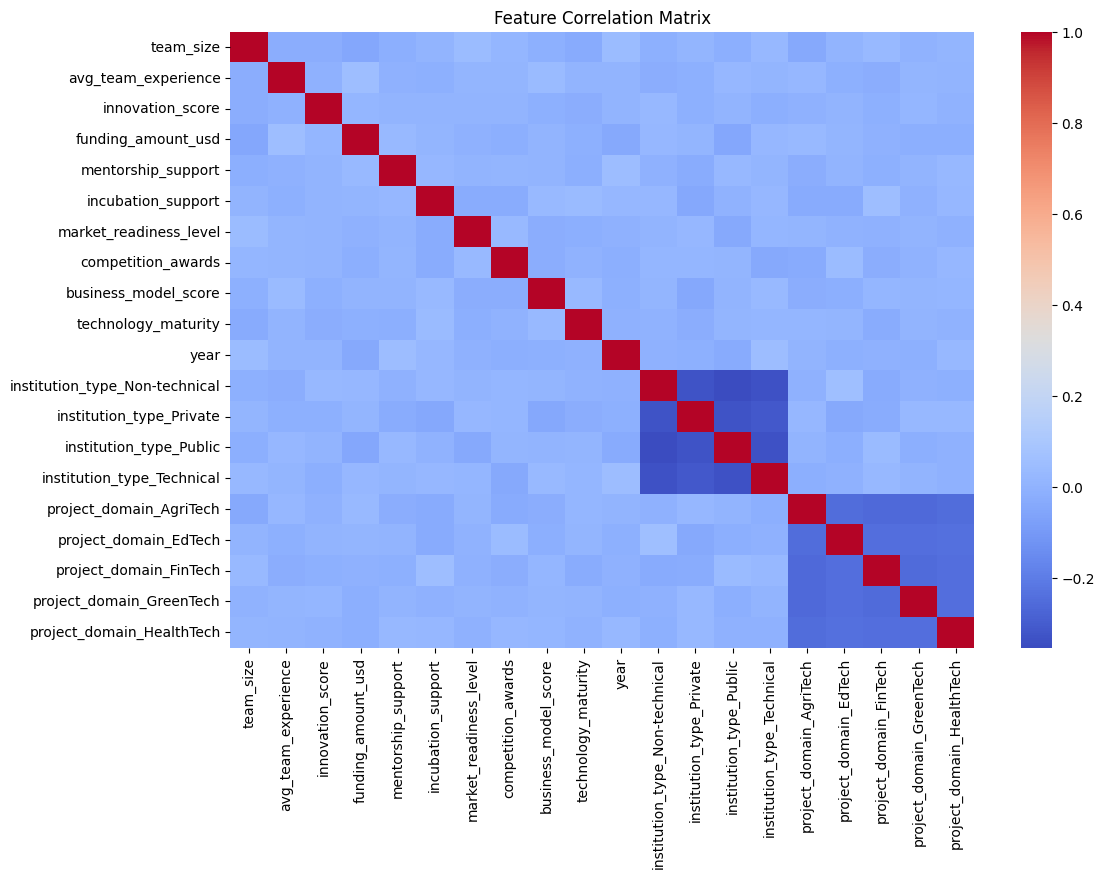

In [17]:
import seaborn as sns 
import matplotlib.pyplot as plt 

plt.figure(figsize=(12,8))
sns.heatmap(X.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [19]:
coefficients = clf.coef_[0]
features = X.columns 

feature_importance = list(zip(features, coefficients))
# Sort by absolute value (most influential first)
feature_importance_sorted = sorted(feature_importance, key=lambda x: abs(x[1]), reverse=True)
for feat, coef in feature_importance_sorted[:10]:
    print(f"{feat}: {coef:.3f}")

technology_maturity: 0.607
market_readiness_level: 0.498
incubation_support: 0.401
mentorship_support: 0.383
innovation_score: 0.147
business_model_score: 0.122
team_size: -0.112
institution_type_Non-technical: 0.028
institution_type_Private: -0.025
project_domain_AgriTech: -0.024


In [20]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
y_proba_rf = rf_clf.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest F1 Score:", f1_score(y_test, y_pred_rf))
print("Random Forest ROC-AUC:", roc_auc_score(y_test, y_proba_rf))


Random Forest Accuracy: 0.9119047619047619
Random Forest F1 Score: 0.8975069252077562
Random Forest ROC-AUC: 0.9786096256684492


In [21]:
y_train_pred_rf = rf_clf.predict(X_train)
y_train_proba_rf = rf_clf.predict_proba(X_train)[:, 1]

print("Train Accuracy:", accuracy_score(y_train, y_train_pred_rf))
print("Train F1 Score:", f1_score(y_train, y_train_pred_rf))
print("Train ROC-AUC:", roc_auc_score(y_train, y_train_proba_rf))



Train Accuracy: 1.0
Train F1 Score: 1.0
Train ROC-AUC: 1.0


# Model Overfitted 😅

In [22]:
importances = rf_clf.feature_importances_
indices = importances.argsort()[::-1]
print("Random Forest Feature Importances (Top 10):")
for i in indices[:10]:
    print(f"{X.columns[i]}: {importances[i]:.3f}")


Random Forest Feature Importances (Top 10):
funding_amount_usd: 0.194
innovation_score: 0.159
incubation_support: 0.121
mentorship_support: 0.110
business_model_score: 0.099
avg_team_experience: 0.060
technology_maturity: 0.053
market_readiness_level: 0.044
team_size: 0.031
year: 0.027


In [23]:
rf_reg = RandomForestClassifier(
    n_estimators=100, 
    max_depth=6,            # Limit tree depth
    min_samples_leaf=10,    # Minimum samples per leaf
    random_state=42
)
rf_reg.fit(X_train, y_train)
y_pred_rf_reg = rf_reg.predict(X_test)
y_proba_rf_reg = rf_reg.predict_proba(X_test)[:, 1]

print("Regularized RF Accuracy:", accuracy_score(y_test, y_pred_rf_reg))
print("Regularized RF F1 Score:", f1_score(y_test, y_pred_rf_reg))
print("Regularized RF ROC-AUC:", roc_auc_score(y_test, y_proba_rf_reg))


Regularized RF Accuracy: 0.9119047619047619
Regularized RF F1 Score: 0.895184135977337
Regularized RF ROC-AUC: 0.9775538775791237
